# Análisis de datos Parquet (Silver Layer)
Este notebook permite explorar los archivos Parquet generados en la etapa **Silver**, verificar su estructura, tipos de datos y realizar análisis básicos.

In [279]:
import pandas as pd
from pathlib import Path

# Rutas
silver_dir = Path('../data/silver')
parquet_files = sorted(silver_dir.glob('*.parquet'))

if not parquet_files:
    raise FileNotFoundError('❌ No se encontraron archivos Parquet en data/silver/')

print(f"📂 Archivos encontrados ({len(parquet_files)}):")
for f in parquet_files:
    print(f" - {f.name}")

📂 Archivos encontrados (272):
 - 2024-05-23.parquet
 - 2024-06-11.parquet
 - 2024-06-12.parquet
 - 2024-06-13.parquet
 - 2024-06-14.parquet
 - 2024-06-17.parquet
 - 2024-06-18.parquet
 - 2024-06-19.parquet
 - 2024-06-20.parquet
 - 2024-06-21.parquet
 - 2024-06-24.parquet
 - 2024-06-25.parquet
 - 2024-06-26.parquet
 - 2024-06-27.parquet
 - 2024-07-10.parquet
 - 2024-07-11.parquet
 - 2024-07-12.parquet
 - 2024-07-15.parquet
 - 2024-07-16.parquet
 - 2024-07-17.parquet
 - 2024-07-18.parquet
 - 2024-07-19.parquet
 - 2024-07-22.parquet
 - 2024-07-23.parquet
 - 2024-07-24.parquet
 - 2024-07-25.parquet
 - 2024-07-26.parquet
 - 2024-07-29.parquet
 - 2024-07-30.parquet
 - 2024-07-31.parquet
 - 2024-08-12.parquet
 - 2024-08-13.parquet
 - 2024-08-14.parquet
 - 2024-08-15.parquet
 - 2024-08-16.parquet
 - 2024-08-20.parquet
 - 2024-08-22.parquet
 - 2024-08-23.parquet
 - 2024-08-26.parquet
 - 2024-08-27.parquet
 - 2024-08-28.parquet
 - 2024-08-29.parquet
 - 2024-08-30.parquet
 - 2024-09-10.parquet
 -

## Leer un archivo Parquet individual

In [280]:
# Cambia el índice si quieres abrir otro archivo
df = pd.read_parquet(parquet_files[0])

print(f"\n📄 Mostrando datos de: {parquet_files[0].name}")
df.head(10)


📄 Mostrando datos de: 2024-05-23.parquet


,producto,presentacion,cantidad,unidad,precio_extra,precio_primera,precio_unidad,variacion,source_file
0,ACELGA,ATADO,10,KILO,10000,9000,1000,None,2024-05-23
1,AHUYAMA,KILO,1,KILO,1300,1100,1300,None,2024-05-23
2,AJO ROSADO,ATADO,10,KILO,90000,85000,9000,None,2024-05-23
3,ALCACHOFA,DOCENA,10,KILO,60000,58000,6000,None,2024-05-23
4,APIO,ATADO,10,KILO,12000,10000,1200,None,2024-05-23
5,ARVEJA VERDE SABANERA,BULTO,50,KILO,450000,440000,9000,None,2024-05-23
6,BERENJENA,KILO,1,KILO,7000,6000,7000,None,2024-05-23
7,BROCOLI,DOCENA,10,KILO,70000,68000,7000,None,2024-05-23
8,CALABACIN,KILO,1,KILO,1000,900,1000,None,2024-05-23
9,CALABAZA,KILO,1,KILO,1000,900,1000,None,2024-05-23


## Validar esquema y tipos de datos

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   producto        164 non-null    string
 1   presentacion    161 non-null    string
 2   cantidad        156 non-null    Int64 
 3   unidad          164 non-null    string
 4   precio_extra    164 non-null    Int64 
 5   precio_primera  164 non-null    Int64 
 6   precio_unidad   164 non-null    Int64 
 7   variacion       0 non-null      object
 8   source_file     164 non-null    string
dtypes: Int64(4), object(1), string(4)
memory usage: 12.3+ KB


## Estadísticas básicas de precios

In [282]:
price_cols = [c for c in df.columns if 'precio' in c]
df[price_cols].describe()

,precio_extra,precio_primera,precio_unidad
count,164.0,164.0,164.0
mean,80037.195122,77571.95122,9913.396341
std,99002.669702,97683.149704,11167.902237
min,1000.0,900.0,1000.0
25%,15900.0,16750.0,2979.25
50%,39000.0,37000.0,5000.0
75%,106250.0,98750.0,12250.0
max,465000.0,465000.0,60000.0


## Productos sin precios o con datos faltantes

In [283]:
df_missing = df[df[price_cols].isna().any(axis=1)]
print(f"Productos con valores faltantes: {len(df_missing)}")
df_missing.head(10)

Productos con valores faltantes: 0


,producto,presentacion,cantidad,unidad,precio_extra,precio_primera,precio_unidad,variacion,source_file


## Cargar todos los Parquet combinados (si existe all_data.parquet)

In [284]:
combined_path = silver_dir / 'all_data.parquet'
if combined_path.exists():
    df_all = pd.read_parquet(combined_path)
    print(f"✅ Cargado all_data.parquet con {len(df_all)} filas y {len(df_all.columns)} columnas")
    display(df_all.sample(10))
else:
    print('⚠️ No existe all_data.parquet aún.')

✅ Cargado all_data.parquet con 42935 filas y 9 columnas


,producto,presentacion,cantidad,unidad,precio_extra,precio_primera,precio_unidad,variacion,source_file
5932,MANDARINA ARRAYANA,CANASTILLA,22,KILO,60000,55000,2727,<NA>,2024-08-22
20212,SAL,BULTO,50,KILO,65000,58500,1300,<NA>,2025-02-19
5062,CALABAZA,KILO,1,KILO,1000,900,1000,<NA>,2024-08-13
23151,PAPAYA TAINUNG,CAJA,<NA>,MADERA,10,30000,28000,Estable,2025-03-18
14891,PATILLA,KILO,1,KILO,1700,1600,1700,<NA>,2024-12-18
12396,CURUBA BOYACENCE,CANASTILLA,22,KILO,50000,48000,2273,<NA>,2024-11-18
3061,HARINA DE TRIGO,BULTO,50,KILO,150000,150000,3000,<NA>,2024-07-16
7951,PIMENTON,KILO,1,KILO,3000,2800,3000,<NA>,2024-09-17
36292,MANGO DE AZUCAR,KILO,1,KILO,3000,2800,3000,Estable,2025-08-05
5300,PAPA R12 NEGRA,BULTO,50,KILO,150000,145000,3000,<NA>,2024-08-14


In [285]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Configuración de visualización
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (10, 5)

In [286]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (10, 5)

In [287]:
files = list(silver_dir.glob("*.parquet"))
if not files:
    raise FileNotFoundError("No hay archivos Parquet en silver/")

df = pd.concat([pd.read_parquet(f) for f in files], ignore_index=True)
print("Total de registros:", len(df))
df.head()

Total de registros: 85870


/tmp/ipykernel_247902/4263277655.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(f) for f in files], ignore_index=True)


,producto,presentacion,cantidad,unidad,precio_extra,precio_primera,precio_unidad,variacion,source_file
0,ALAS DE POLLO,KILO,1,KILO,10000,10000,10000,Estable,2025-04-22
1,MENUDENCIAS,KILO,1,KILO,2000,2000,2000,Estable,2025-04-22
2,PECHUGA DE POLLO,KILO,1,KILO,13500,13500,13500,Estable,2025-04-22
3,PERNILES DE POLLO,KILO,1,KILO,11000,11000,11000,Estable,2025-04-22
4,POLLO SIN VICERAS,KILO,1,KILO,11000,11000,11000,Estable,2025-04-22


In [288]:
df.columns = df.columns.str.lower().str.strip()

# Convertir fecha si existe o inferir desde nombre de archivo
if "fecha" not in df.columns:
    # Extrae fecha desde el nombre del archivo, ejemplo: precios_2024-10-05.parquet
    df["fecha"] = df["source_file"].str.extract(r"(\d{4}-\d{2}-\d{2})")

df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")

In [289]:
productos = sorted(df["producto"].dropna().unique())
print("Productos disponibles:", len(productos))
productos[:100]

Productos disponibles: 205


['/ROCOL',
 'ACEITE',
 'ACEITE (1000',
 'ACEITE (1000 c.c)',
 'ACEITE (500c.c)',
 'ACEITE GALON (3000',
 'ACEITE GALON (3000 c.c)',
 'ACELGA',
 'AGUACATE',
 'AGUACATE HASS',
 'AGUACATE HASS X TONELADA',
 'AGUACATE PIELES VERDES X TONELADA',
 'AHUYAMA',
 'AJO ROSADO',
 'ALAS DE POLLO',
 'ALCACHOFA',
 'APIO',
 'ARRACACHA',
 'ARROZ CORRIENTE',
 'ARROZ ORYZICA',
 'ARROZ SOPA CRISTAL',
 'ARVEJA VERDE',
 'ARVEJA VERDE SABANERA',
 'ARVEJA VERDE SECA',
 'AZUCAR EMPACADA',
 'AZUCAR SULFITADA',
 'BAGRE DORADO',
 'BAGRE DORADO K I L',
 'BAGRE PINTADO',
 'BANANO CRIOLLO',
 'BANANO CRIOLLO CAJA',
 'BANANO CRIOLLO CAJA DE',
 'BANANO URABA',
 'BERENJENA',
 'BLANCA',
 'BLANQUILLO GALLEGO',
 'BOCA CHICO',
 'BREVA',
 'BROCOLI',
 'BULTO 50 KILO',
 'BULTO 60 KILO',
 'CACHAMA',
 'CADERA',
 'CAFE 500GR',
 'CAJARO',
 'CALABACIN',
 'CALABAZA',
 'CAMARON TIGRE',
 'CAMARON TITI',
 'CAPACETA',
 'CARACOL ALMEJA',
 'CEBADA',
 'CEBOLLA CABEZONA BLANCA',
 'CEBOLLA CABEZONA ROJA',
 'CEBOLLA LARGA',
 'CEBOLLA LARGA RO

In [ ]:
producto = "PAPA PASTUSA"  # <-- cambia este valor para probar otros productos
data = df[df["producto"].str.upper() == producto.upper()]

if data.empty:
    raise ValueError(f"No se encontró información para el producto '{producto}'")

In [291]:
data_sorted = data.sort_values("fecha")
data_sorted[["fecha", "precio_extra", "precio_primera", "precio_unidad"]].head(10)

,fecha,precio_extra,precio_primera,precio_unidad
6749,2024-05-23,4000,3500,4000
64563,2024-05-23,4000,3500,4000
70240,2024-06-11,4000,3500,4000
6913,2024-06-11,4000,3500,4000
7077,2024-06-12,4000,3500,4000
56955,2024-06-12,4000,3500,4000
81166,2024-06-13,4000,3500,4000
7241,2024-06-13,4000,3500,4000
56791,2024-06-14,4000,3500,4000
7405,2024-06-14,4000,3500,4000


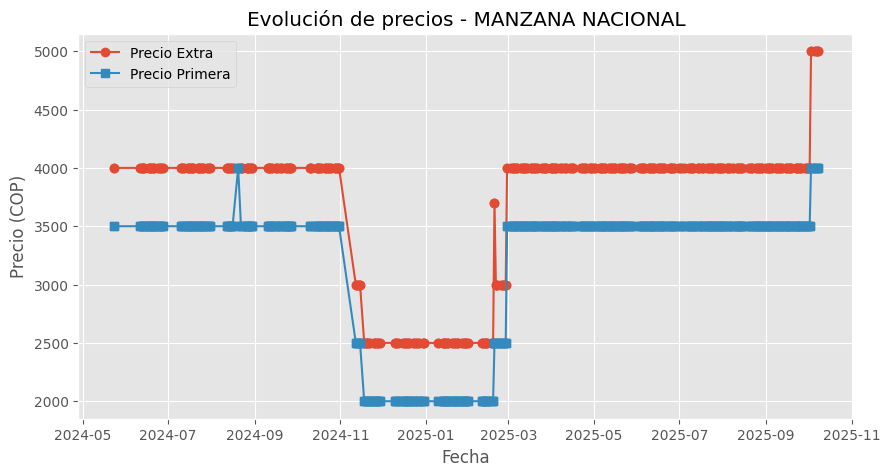

In [292]:
plt.figure()
plt.plot(data_sorted["fecha"], data_sorted["precio_extra"], label="Precio Extra", marker="o")
plt.plot(data_sorted["fecha"], data_sorted["precio_primera"], label="Precio Primera", marker="s")

plt.title(f"Evolución de precios - {producto}")
plt.xlabel("Fecha")
plt.ylabel("Precio (COP)")
plt.legend()
plt.grid(True)
plt.show()

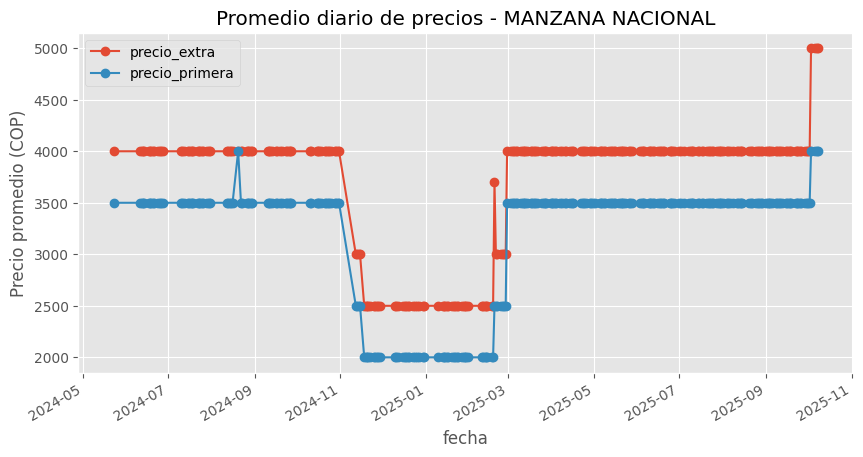

In [293]:
avg_prices = data.groupby("fecha")[["precio_extra", "precio_primera"]].mean()
avg_prices.plot(title=f"Promedio diario de precios - {producto}", marker="o")
plt.ylabel("Precio promedio (COP)")
plt.show()

In [294]:
df_monthly = (
    data_sorted
    .assign(mes=lambda d: d["fecha"].dt.to_period("M").astype(str))
    .groupby("mes")[["precio_extra", "precio_primera", "precio_unidad"]]
    .mean()
    .reset_index()
)

df_monthly.head()

,mes,precio_extra,precio_primera,precio_unidad
0,2024-05,4000.0,3500.0,4000.0
1,2024-06,4000.0,3500.0,4000.0
2,2024-07,4000.0,3500.0,4000.0
3,2024-08,4000.0,3538.461538,3961.538462
4,2024-09,4000.0,3500.0,4000.0


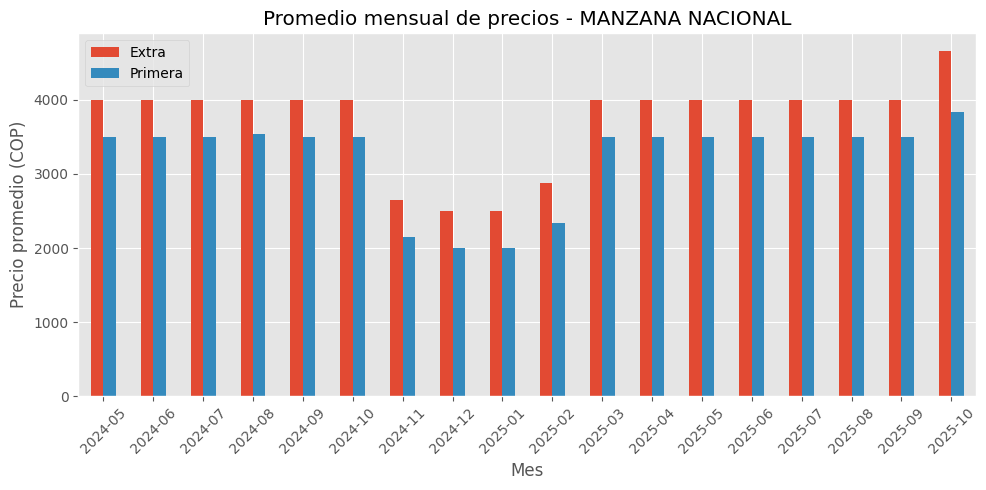

In [295]:
ax = df_monthly.plot(
    x="mes",
    y=["precio_extra", "precio_primera"],
    kind="bar",
    figsize=(10, 5),
    title=f"Promedio mensual de precios - {producto}",
    rot=45
)

ax.set_xlabel("Mes")
ax.set_ylabel("Precio promedio (COP)")
ax.legend(["Extra", "Primera", "Unidad"])
plt.tight_layout()
plt.show()

In [296]:
# Aseguramos que la fecha esté en formato datetime
data_sorted["fecha"] = pd.to_datetime(data_sorted["fecha"], errors="coerce")

# Extraemos año y mes
data_sorted["año"] = data_sorted["fecha"].dt.year
data_sorted["mes"] = data_sorted["fecha"].dt.month

# Agrupar por año y mes, calcular promedio mensual
df_year_compare = (
    data_sorted
    .groupby(["año", "mes"])[["precio_extra", "precio_primera", "precio_unidad"]]
    .mean()
    .reset_index()
)

In [297]:
import calendar
df_year_compare["mes_nombre"] = df_year_compare["mes"].apply(lambda x: calendar.month_abbr[x])

# %%
# Pivotear para tener años como columnas
pivot = df_year_compare.pivot_table(
    index="mes_nombre",
    columns="año",
    values="precio_extra",  # <-- puedes cambiar por "precio_primera" o "precio_unidad"
    aggfunc="mean"
).reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])


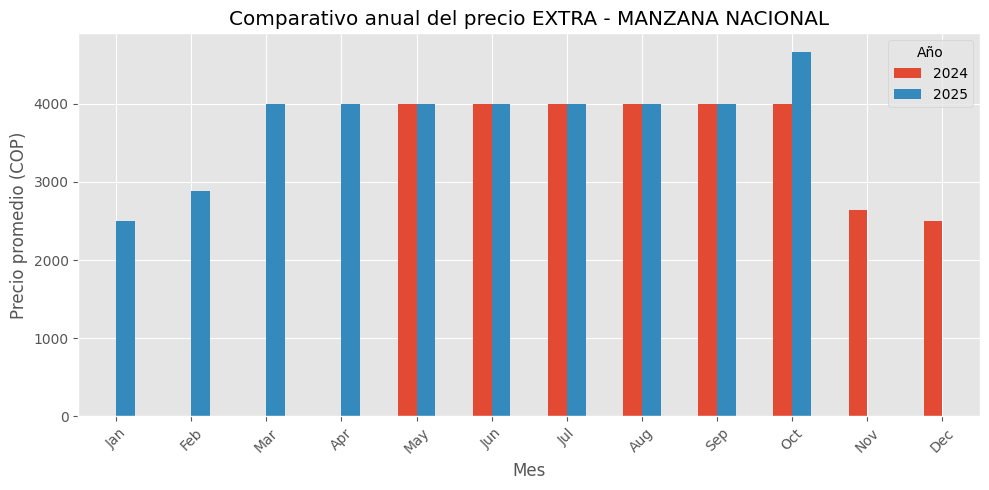

In [298]:
pivot.plot(kind="bar", figsize=(10, 5))
plt.title(f"Comparativo anual del precio EXTRA - {producto}")
plt.xlabel("Mes")
plt.ylabel("Precio promedio (COP)")
plt.legend(title="Año")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()